In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.metrics import CategoricalCrossentropy
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[0]
single_image.shape

(28, 28)

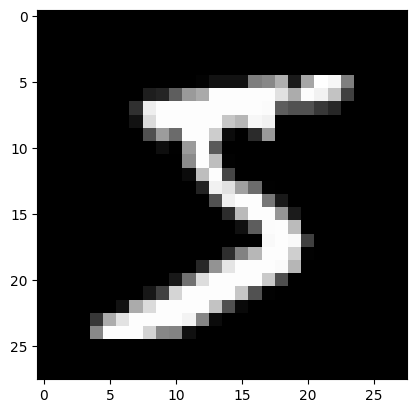

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)
y_train_onehot.shape

(60000, 10)

VASUNDRA SRI, 212222230110


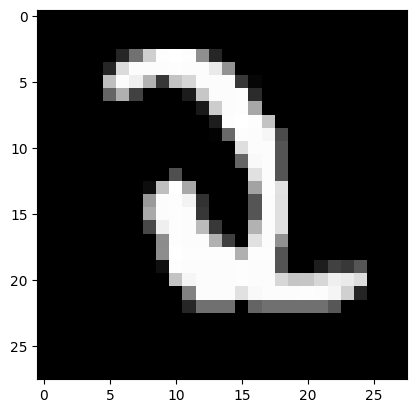

In [ ]:
print("VASUNDRA SRI, 212222230110")
single_image = X_train[400]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential()

model.add(Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,474 (72.16 KB)

 Trainable params: 18,474 (72.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 38ms/step - accuracy: 0.6096 - loss: 1.1307 - val_accuracy: 0.9646 - val_loss: 0.1161
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - accuracy: 0.8948 - loss: 0.3294 - val_accuracy: 0.9766 - val_loss: 0.0813
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 39ms/step - accuracy: 0.9149 - loss: 0.2582 - val_accuracy: 0.9807 - val_loss: 0.0639
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - accuracy: 0.9280 - loss: 0.2164 - val_accuracy: 0.9828 - val_loss: 0.0572
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.9365 - loss: 0.1959 - val_accuracy: 0.9836 - val_loss: 0.0544


In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.770433,0.692996,0.9646,0.116109
1,0.900583,0.308114,0.9766,0.081329
2,0.919500,0.248094,0.9807,0.063897
3,0.930633,0.210229,0.9828,0.057203
4,0.939833,0.186708,0.9836,0.054388


VASUNDRA SRI R, 212222230168


<Axes: >

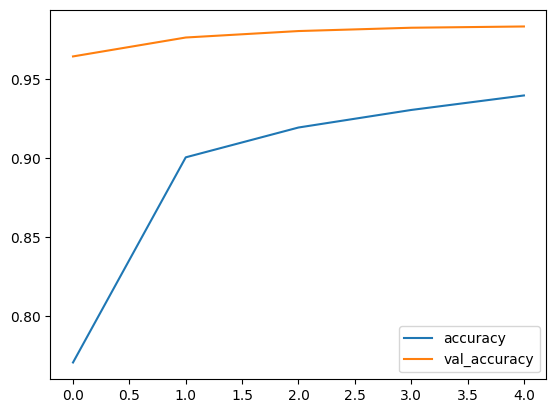

In [ ]:
print('VASUNDRA SRI R, 212222230168')
metrics[['accuracy','val_accuracy']].plot()

VASUNDRA SRI R


<Axes: >

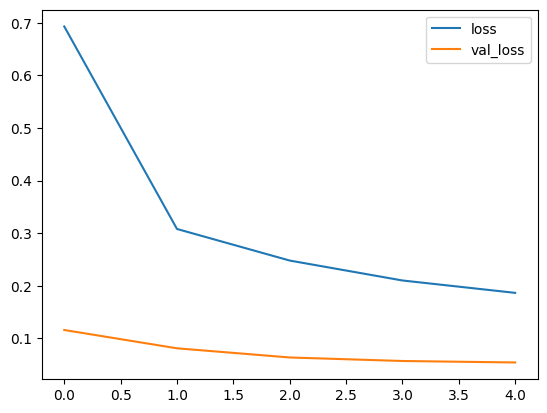

In [52]:
print('VASUNDRA SRI R')
metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [48]:
print('VASUNDRA SRI R')
print(confusion_matrix(y_test,x_test_predictions))

VASUNDRA SRI R
[[ 971    1    1    0    0    0    5    1    1    0]
 [   0 1131    1    0    0    0    1    2    0    0]
 [   2    7 1014    1    0    0    0    5    3    0]
 [   0    0    2  997    0    4    0    2    4    1]
 [   0    0    2    0  976    0    1    0    3    0]
 [   1    0    0    6    0  871    8    1    4    1]
 [   5    3    0    0    2    1  946    0    1    0]
 [   0    6    8    2    1    0    1 1003    2    5]
 [   2    2    2    1    2    0    0    2  960    3]
 [   4    3    1    3   19    2    0    5    5  967]]


In [49]:
print('VASUNDRA SRI R')
print(classification_report(y_test,x_test_predictions))

VASUNDRA SRI R
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
img = image.load_img('image 8.jpg')

In [ ]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
img = image.load_img('image 8.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [ ]:
print(x_single_prediction)

VASUNDRA SRI R


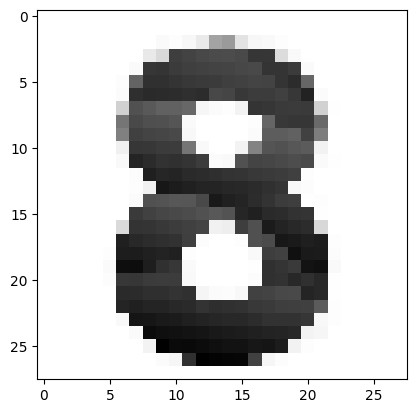

In [50]:
print('VASUNDRA SRI R')
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [44]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [45]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [51]:
print(x_single_prediction)
print("VASUNDRA SRI R")

[8]
VASUNDRA SRI R
